## Swimming PSB Challenge

> In the challenge you'll be wrangling the the `swimming_psb` data set to produce the output shown at the bottom of this notebook.

> Keep a [Cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) handy? or the [Pandas API Reference in Docs](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)?

In [ ]:
import pandas as pd

psb_df = pd.read_csv('data/swimming_psb_data.csv')

psb_df.info()
psb_df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16948 entries, 0 to 16947
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   c_Sport        16948 non-null  object
 1   c_Season       16948 non-null  int64 
 2   c_Event        16948 non-null  object
 3   c_Gender       16948 non-null  object
 4   n_DateSort     16948 non-null  int64 
 5   c_Person       16640 non-null  object
 6   c_PersonNatio  16640 non-null  object
 7   c_NOC          16948 non-null  object
 8   c_Result       16948 non-null  object
 9   n_ResultSort   16948 non-null  int64 
 10  c_Class        16948 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


,c_Sport,c_Season,c_Event,c_Gender,n_DateSort,c_Person,c_PersonNatio,c_NOC,c_Result,n_ResultSort,c_Class
0,Swimming,2018,100m Backstroke,Men,20180809,Ryan Murphy,United States,United States,51.94,51940,Elite
1,Swimming,2018,100m Backstroke,Men,20180822,Xu Jiayu,China,China,52.30,52300,Elite
2,Swimming,2018,100m Backstroke,Men,20180806,Kliment Kolesnikov,Russia,Russia,52.51,52510,Elite
3,Swimming,2018,100m Backstroke,Men,20180819,Ryosuke Irie,Japan,Japan,52.53,52530,Elite
4,Swimming,2018,100m Backstroke,Men,20180728,Matt Grevers,United States,United States,52.55,52550,Elite
5,Swimming,2018,100m Backstroke,Men,20180809,Evgeniy Rylov,Russia,Russia,52.66,52660,Elite
6,Swimming,2018,100m Backstroke,Men,20180810,Mitch Larkin,Australia,Australia,52.88,52880,Elite


#### 1. Remove ```c_Sport```, ```c_Season``` and ```c_Class``` columns.
> Because you decide you don't need them...

In [ ]:
removecols = ['c_Sport', 'c_Season','c_Class']
psb_df.drop(removecols, inplace=True, axis=1)
psb_df

,c_Event,c_Gender,n_DateSort,c_Person,c_PersonNatio,c_NOC,c_Result,n_ResultSort
0,100m Backstroke,Men,20180809,Ryan Murphy,United States,United States,51.94,51940
1,100m Backstroke,Men,20180822,Xu Jiayu,China,China,52.30,52300
2,100m Backstroke,Men,20180806,Kliment Kolesnikov,Russia,Russia,52.51,52510
3,100m Backstroke,Men,20180819,Ryosuke Irie,Japan,Japan,52.53,52530
4,100m Backstroke,Men,20180728,Matt Grevers,United States,United States,52.55,52550
...,...,...,...,...,...,...,...,...
16943,800m Freestyle,Women,20180726,Klara Bosnjak,Croatia,Croatia,9:02.44,542440
16944,800m Freestyle,Women,20180519,Chantel Jeffrey,Canada,Canada,9:02.47,542470
16945,800m Freestyle,Women,20180421,Bindi Ware,Australia,Australia,9:02.48,542480
16946,800m Freestyle,Women,20180302,Ebony Blackstone,Australia,Australia,9:02.54,542540


#### 2. Output all unique events (```c_Event```).
> Becasue you want to checkout which Swimming events are in the data.

In [ ]:
psb_df['c_Event'].unique()

array(['100m Backstroke', '100m Breaststroke', '100m Butterfly',
       '100m Freestyle', '1500m Freestyle', '200m Backstroke',
       '200m Breaststroke', '200m Butterfly', '200m Freestyle',
       '200m Individual Medley', '4 x 100m Freestyle Relay',
       '4 x 100m Medley Relay', '4 x 200m Freestyle Relay',
       '400m Freestyle', '400m Individual Medley', '50m Backstroke',
       '50m Breaststroke', '50m Butterfly', '50m Freestyle',
       '800m Freestyle'], dtype=object)

#### 3a. Find all rows with NaN values.
> Because you want to identify where these values are coming from...more examples [here](https://datatofish.com/rows-with-nan-pandas-dataframe/).

In [ ]:
nan_rows = psb_df[psb_df.isnull().any(axis=1)]
nan_rows
# Alternative method
# nan_rows = psb_df[psb_df.isna().any(axis=1)]
# nan_rows

# rows_with_nan_values = psb_df[psb_df.isnull().any(axis=1)]
# rows_with_nan_values

,c_Event,c_Gender,n_DateSort,c_Person,c_PersonNatio,c_NOC,c_Result,n_ResultSort
9743,4 x 100m Freestyle Relay,Men,20180809,NaN,NaN,Brazil,3:12.02,192020
9744,4 x 100m Freestyle Relay,Men,20180803,NaN,NaN,Russia,3:12.23,192230
9745,4 x 100m Freestyle Relay,Men,20180809,NaN,NaN,Australia,3:12.53,192530
9746,4 x 100m Freestyle Relay,Men,20180809,NaN,NaN,Japan,3:12.54,192540
9747,4 x 100m Freestyle Relay,Men,20180803,NaN,NaN,Italy,3:12.90,192900
...,...,...,...,...,...,...,...,...
10046,4 x 200m Freestyle Relay,Women,20180824,NaN,NaN,New Zealand,8:18.91,498910
10047,4 x 200m Freestyle Relay,Women,20180821,NaN,NaN,Indonesia,8:21.51,501510
10048,4 x 200m Freestyle Relay,Women,20180708,NaN,NaN,Portugal,8:24.56,504560
10049,4 x 200m Freestyle Relay,Women,20180708,NaN,NaN,Slovakia,8:27.47,507470


#### 3b. Find all Unique values in the ```c_Event``` column from the ```rows_with_nan_values``` you created above.
> Because you want to confirm all the NaN values are coming specificly from relay events maybe???

In [ ]:
unique_rows = nan_rows['c_Event'].unique()
unique_rows

array(['4 x 100m Freestyle Relay', '4 x 100m Medley Relay',
       '4 x 200m Freestyle Relay'], dtype=object)

#### 4. Drop all rows in `psb_df` with a NaN values. 
> There are several solutions here...you could actually try provide a value for the missing data...however, in this instance, you decide it's ok to just drop all the rows with NaN values.

In [ ]:
dropped_nan_values = psb_df.dropna()
dropped_nan_values

,c_Event,c_Gender,n_DateSort,c_Person,c_PersonNatio,c_NOC,c_Result,n_ResultSort
0,100m Backstroke,Men,20180809,Ryan Murphy,United States,United States,51.94,51940
1,100m Backstroke,Men,20180822,Xu Jiayu,China,China,52.30,52300
2,100m Backstroke,Men,20180806,Kliment Kolesnikov,Russia,Russia,52.51,52510
3,100m Backstroke,Men,20180819,Ryosuke Irie,Japan,Japan,52.53,52530
4,100m Backstroke,Men,20180728,Matt Grevers,United States,United States,52.55,52550
...,...,...,...,...,...,...,...,...
16943,800m Freestyle,Women,20180726,Klara Bosnjak,Croatia,Croatia,9:02.44,542440
16944,800m Freestyle,Women,20180519,Chantel Jeffrey,Canada,Canada,9:02.47,542470
16945,800m Freestyle,Women,20180421,Bindi Ware,Australia,Australia,9:02.48,542480
16946,800m Freestyle,Women,20180302,Ebony Blackstone,Australia,Australia,9:02.54,542540


#### 5. Reset the Index
> Because you've removed some rows, you decide to reset your Dataframe's index (not nessesity in this case, but good practice to do so)

In [ ]:
## Resest index column as taking rows out would mean the index is out by (however many rows removed)
    ##inplace=True makes change permanent (overwriting the dropped_nan_values variable - stops you having to create new copies of the dataframe as you're going through)
    ##drop=True drops previous index (which is the on which would be out by x numbers)
## Now we've delted rows, if we wanted to loop through and index by row, we hit a point when we get an index error as it would try and find a row that doesn't ecist - this creates a sequencial list from data we want to keep)
dropped_nan_values.reset_index(inplace=True, drop=True)
dropped_nan_values

,c_Event,c_Gender,n_DateSort,c_Person,c_PersonNatio,c_NOC,c_Result,n_ResultSort
0,100m Backstroke,Men,20180809,Ryan Murphy,United States,United States,51.94,51940
1,100m Backstroke,Men,20180822,Xu Jiayu,China,China,52.30,52300
2,100m Backstroke,Men,20180806,Kliment Kolesnikov,Russia,Russia,52.51,52510
3,100m Backstroke,Men,20180819,Ryosuke Irie,Japan,Japan,52.53,52530
4,100m Backstroke,Men,20180728,Matt Grevers,United States,United States,52.55,52550
...,...,...,...,...,...,...,...,...
16635,800m Freestyle,Women,20180726,Klara Bosnjak,Croatia,Croatia,9:02.44,542440
16636,800m Freestyle,Women,20180519,Chantel Jeffrey,Canada,Canada,9:02.47,542470
16637,800m Freestyle,Women,20180421,Bindi Ware,Australia,Australia,9:02.48,542480
16638,800m Freestyle,Women,20180302,Ebony Blackstone,Australia,Australia,9:02.54,542540


#### 6. Rename all the column headers in the dataframe, so each header makes sense to you...
> e.g. rename ```c_Person``` to ```athlete```...

In [ ]:
## call the dataframe, use the .rename method and create a dictionary, calling the columns and replacing the current name with new name for each column)
dropped_nan_values.rename(columns={"c_Event":"Event", "c_Gender":"Gender", "n_DateSort":"Date", "c_Person":"Athlete", "c_PersonNatio":"Nation", "c_NOC":"NOC", "c_Result":"Time(s)", "n_ResultSort":"Time(ms)"},inplace=True)
dropped_nan_values

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Event,Gender,Date,Athlete,Nation,NOC,Time(s),Time(ms)
0,100m Backstroke,Men,20180809,Ryan Murphy,United States,United States,51.94,51940
1,100m Backstroke,Men,20180822,Xu Jiayu,China,China,52.30,52300
2,100m Backstroke,Men,20180806,Kliment Kolesnikov,Russia,Russia,52.51,52510
3,100m Backstroke,Men,20180819,Ryosuke Irie,Japan,Japan,52.53,52530
4,100m Backstroke,Men,20180728,Matt Grevers,United States,United States,52.55,52550
...,...,...,...,...,...,...,...,...
16635,800m Freestyle,Women,20180726,Klara Bosnjak,Croatia,Croatia,9:02.44,542440
16636,800m Freestyle,Women,20180519,Chantel Jeffrey,Canada,Canada,9:02.47,542470
16637,800m Freestyle,Women,20180421,Bindi Ware,Australia,Australia,9:02.48,542480
16638,800m Freestyle,Women,20180302,Ebony Blackstone,Australia,Australia,9:02.54,542540


#### 7. Transform each value in the ```date_sort``` column into a DateTime Object using the [```.to_datetime```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.
> Because it's better to handle dates as actual DateTime objects in Python...

In [ ]:
dropped_nan_values["Date"] = pd.to_datetime(dropped_nan_values["Date"].astype(str), format='%Y%m%d')
dropped_nan_values
## add this to the end after the bracket to remove 00:00:00, but converts to object not datetime64: .dt.strftime('%Y-%m-%d')

/tmp/ipykernel_3430/11701234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_nan_values["Date"] = pd.to_datetime(dropped_nan_values["Date"].astype(str), format='%Y%m%d')


,Event,Gender,Date,Athlete,Nation,NOC,Time(s),Time(ms)
0,100m Backstroke,Men,2018-08-09,Ryan Murphy,United States,United States,51.94,51940
1,100m Backstroke,Men,2018-08-22,Xu Jiayu,China,China,52.30,52300
2,100m Backstroke,Men,2018-08-06,Kliment Kolesnikov,Russia,Russia,52.51,52510
3,100m Backstroke,Men,2018-08-19,Ryosuke Irie,Japan,Japan,52.53,52530
4,100m Backstroke,Men,2018-07-28,Matt Grevers,United States,United States,52.55,52550
...,...,...,...,...,...,...,...,...
16635,800m Freestyle,Women,2018-07-26,Klara Bosnjak,Croatia,Croatia,9:02.44,542440
16636,800m Freestyle,Women,2018-05-19,Chantel Jeffrey,Canada,Canada,9:02.47,542470
16637,800m Freestyle,Women,2018-04-21,Bindi Ware,Australia,Australia,9:02.48,542480
16638,800m Freestyle,Women,2018-03-02,Ebony Blackstone,Australia,Australia,9:02.54,542540


#### 8. Create a column for each athlete's ```first name``` and ```last name```.
> Seems futile, but you decide this may save you ALOT of time in the future...

In [ ]:
##create new variable, split the string of the athlete column by the space, (n=1 means splits on first time it see's the delimiter, so won't triple split a double barrel), and expand to 2 columns##
# first_last_names = dropped_nan_values['Athlete'].str.split(" ", n=1, expand = True)
# ## create a new column in the dataframe called first name and add the new (1st) column from first_last_names##
# dropped_nan_values['First Name'] = first_last_names [0]
# ## create another new column in the dataframe called last name and add the new (2nd) column from first_last_names##
# dropped_nan_values['Last Name'] = first_last_names [1]
# dropped_nan_values

##can do on one line##
dropped_nan_values[['First Name', 'Last Name']] = dropped_nan_values['Athlete'].str.split(" ", n=1, expand = True)[[0,1]]
dropped_nan_values


/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Event,Gender,Date,Athlete,Nation,NOC,Time(s),Time(ms),First Name,Last Name
0,100m Backstroke,Men,2018-08-09,Ryan Murphy,United States,United States,51.94,51940,Ryan,Murphy
1,100m Backstroke,Men,2018-08-22,Xu Jiayu,China,China,52.30,52300,Xu,Jiayu
2,100m Backstroke,Men,2018-08-06,Kliment Kolesnikov,Russia,Russia,52.51,52510,Kliment,Kolesnikov
3,100m Backstroke,Men,2018-08-19,Ryosuke Irie,Japan,Japan,52.53,52530,Ryosuke,Irie
4,100m Backstroke,Men,2018-07-28,Matt Grevers,United States,United States,52.55,52550,Matt,Grevers
...,...,...,...,...,...,...,...,...,...,...
16635,800m Freestyle,Women,2018-07-26,Klara Bosnjak,Croatia,Croatia,9:02.44,542440,Klara,Bosnjak
16636,800m Freestyle,Women,2018-05-19,Chantel Jeffrey,Canada,Canada,9:02.47,542470,Chantel,Jeffrey
16637,800m Freestyle,Women,2018-04-21,Bindi Ware,Australia,Australia,9:02.48,542480,Bindi,Ware
16638,800m Freestyle,Women,2018-03-02,Ebony Blackstone,Australia,Australia,9:02.54,542540,Ebony,Blackstone


#### Finale: Have a final Dataframe that contains only the top (up to 4) Great British swimmers for each event and gender. Then save this data into a new csv or json file.
> Hint: The dataset you have been handling is already sorted and grouped. Fastest swimmers (top four) would be at the top of each group (gender/event).

In [ ]:
## create new variable and select just GB athletes ##
# GB = dropped_nan_values.loc[dropped_nan_values['NOC'] == 'Great Britain']
# ##from this new dataframe, group by event and gender, and .head(4) picks the top 4 from each group - then reset the index and drop=True remvoes the old index)
# Top_4_GB = GB.groupby(['Event','Gender']).head(4).reset_index(drop=True)
# Top_4_GB
## as data is already sorted by time then when you choose.head(4) it will pick the fastest 4
    ## if wasn't already, could sort first by the time column and then go from that

##In one line....##
GB = dropped_nan_values.loc[dropped_nan_values['NOC'] == 'Great Britain'].groupby(['Event','Gender']).head(4).reset_index(drop=True)
GB

,Event,Gender,Date,Athlete,Nation,NOC,Time(s),Time(ms),First Name,Last Name
0,100m Backstroke,Men,2018-04-07,Chris Walker-Hebborn,England,Great Britain,54.23,54230,Chris,Walker-Hebborn
1,100m Backstroke,Men,2018-04-06,Luke Greenbank,England,Great Britain,54.37,54370,Luke,Greenbank
2,100m Backstroke,Men,2018-08-06,Nicholas Pyle,Great Britain,Great Britain,54.50,54500,Nicholas,Pyle
3,100m Backstroke,Men,2018-04-06,Xavier Castelli,Wales,Great Britain,54.60,54600,Xavier,Castelli
4,100m Backstroke,Women,2018-08-06,Georgia Davies,Wales,Great Britain,59.12,59120,Georgia,Davies
...,...,...,...,...,...,...,...,...,...,...
131,800m Freestyle,Men,2018-07-07,Nathan Hughes,Great Britain,Great Britain,8:05.15,485150,Nathan,Hughes
132,800m Freestyle,Women,2018-04-09,Holly Hibbott,England,Great Britain,8:29.05,509050,Holly,Hibbott
133,800m Freestyle,Women,2018-04-09,Camilla Hattersley,Scotland,Great Britain,8:32.65,512650,Camilla,Hattersley
134,800m Freestyle,Women,2018-04-08,Jazmin Carlin,Wales,Great Britain,8:36.52,516520,Jazmin,Carlin


### Bonus

**The aim is to create a visualisation** that shows the performance standards for each gender and event relative to the respective world record at the time. This visualisation uses world record times (2018) found in the `world_records_swimming.json` file (`data` folder). To enable a visualisation that can show both genders and all the events, at once, requires us to standardise the results data. We can do this by creating another ***result*** that is the relevent world record as a percentage of the actual result e.g.


> **Men 100m Backstroke - Ryan Murphy, United States - `51.94` (seconds) or `51940` (milliseconds)**


In [ ]:
import json

wrs = json.load(open('data/world_records_swimming.json'))

wr_secs = float(wrs['Men']['100m Backstroke'])
result = 51.94

wr_percentage = wr_secs / result * 100

round(wr_percentage, 2)


99.83

> Hints

1. Include any relevant cleaning steps in the cell below before attempting to create the new column with the percentage data.
2. Note that some of the world record times are not in seconds. It may be an idea to reformat the world records into milliseconds?
3. We import [```seaborn```](https://seaborn.pydata.org/generated/seaborn.violinplot.html) to create the Violin Plots. e.g. https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [ ]:
import json

#load json file
wrs = json.load(open('data/world_records_swimming.json'))  # Pandas is not always nessisary when handling data, a simple dictionary can be far simpler to handle ;)
#create dataframe from json
wrs_df = pd.read_json('data/world_records_swimming.json')


#create a new variable for men extracting last 2 digits, have to call a .str as the json file imported as a string (tenths & hundredths)
men_hundredths = wrs_df['Men'].str[-2:]
#create a new variable extracting 2 digits from -5 to -3 (seconds)
men_seconds = wrs_df['Men'].str[-5:-3]
#create a new variable extracting 2 digits from -8 to -6 (minutes)
men_minutes = wrs_df['Men'].str[-8:-6]

#Then need to add these as new columns to the wrs_df
wrs_df ['men_minutes'] = men_minutes
wrs_df ['men_seconds'] = men_seconds
wrs_df ['men_hundredths'] = men_hundredths

#Issue is there are blanks if for example there are no minutes in the data, so have to convert blanks to 0s
wrs_df['men_minutes'] = wrs_df['men_minutes'].replace("","0")
#convert each new column to integers (have to do this after the "" to "0" step)
wrs_df = wrs_df.astype({'men_hundredths':'int','men_seconds':'int','men_minutes':'int'})


# #now create minutes and seconds columns into hundredths (to then create one column with the time in hundredths)
#new minutes column as hundredths
wrs_df ['men_minutes as hundredths'] = wrs_df['men_minutes']*6000
#new seconds column as hundredths
wrs_df ['men_seconds as hundredths'] = wrs_df['men_seconds']*100
#create a new column adding the two new hundredths columns and the original hundreths column to have a total hundredths column
wrs_df ['men_total_hundredths'] = wrs_df['men_minutes as hundredths'] + wrs_df['men_seconds as hundredths'] + wrs_df['men_hundredths']
#finally create a total seconds column by divifing this new total hundredths column by 100
wrs_df ['men_total_seconds'] = wrs_df['men_total_hundredths']/100


#There is a bad data point at row 10 for the women, with only 1 decimal point, so can manually change this
wrs_df['Women'][9] = '29.40'

#create a new variable for women extracting last 2 digits, have to call a .str as the json file imported as a string (tenths & hundredths)
women_hundredths = wrs_df['Women'].str[-2:]
#create a new variable extracting 2 digits from -5 to -3 (seconds)
women_seconds = wrs_df['Women'].str[-5:-3]
#create a new variable extracting 2 digits from -8 to -6 (minutes)
women_minutes = wrs_df['Women'].str[-8:-6]

#Then need to add these as new columns to the wrs_df
wrs_df ['women_minutes'] = women_minutes
wrs_df ['women_seconds'] = women_seconds
wrs_df ['women_hundredths'] = women_hundredths

#Issue is there are blanks if for example there are no minutes in the data, so have to convert blanks to 0s
wrs_df['women_minutes'] = wrs_df['women_minutes'].replace("","0")
#convert each new column to integers (have to do this after the "" to "0" step)
wrs_df = wrs_df.astype({'women_hundredths':'int','women_seconds':'int','women_minutes':'int'})

#now create minutes and seconds columns into hundredths (to then create one column with the time in hundredths)
#new minutes column as hundredths
wrs_df ['women_minutes as hundredths'] = wrs_df['women_minutes']*6000
#new seconds column as hundredths
wrs_df ['women_seconds as hundredths'] = wrs_df['women_seconds']*100
#create a new column adding the two new hundredths columns and the original hundreths column to have a total hundredths column
wrs_df ['women_total_hundredths'] = wrs_df['women_minutes as hundredths'] + wrs_df['women_seconds as hundredths'] + wrs_df['women_hundredths']
#finally create a total seconds column by divifing this new total hundredths column by 100
wrs_df ['women_total_seconds'] = wrs_df['women_total_hundredths']/100

#make the index the event column and reset the index
wrs_df['Event'] = wrs_df.index
wrs_df = wrs_df.reset_index(level=0)
 

#There are several columns not needed, so can drop these by creating a new df with .drop (remember have to add the ,axis=1 at the end to choose to drop columns)
wrs_df_final = wrs_df.drop(['index','men_minutes','men_seconds','men_hundredths','men_minutes as hundredths','men_seconds as hundredths','women_minutes','women_seconds','women_hundredths','women_minutes as hundredths','women_seconds as hundredths'],axis=1)
wrs_df_final

#... code continues on next cell block below


/tmp/ipykernel_3430/2485757480.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrs_df['Women'][9] = '29.40'


,Men,Women,men_total_hundredths,men_total_seconds,women_total_hundredths,women_total_seconds,Event
0,20.91,23.67,2091,20.91,2367,23.67,50m Freestyle
1,46.91,51.71,4691,46.91,5171,51.71,100m Freestyle
2,1:42.00,1:52.98,10200,102.00,11298,112.98,200m Freestyle
3,3:40.07,3:56.46,22007,220.07,23646,236.46,400m Freestyle
4,7:32.12,8:04.79,45212,452.12,48479,484.79,800m Freestyle
5,14:31.02,15:20.48,87102,871.02,92048,920.48,1500m Freestyle
6,24.00,26.98,2400,24.00,2698,26.98,50m Backstroke
7,51.85,58.00,5185,51.85,5800,58.00,100m Backstroke
8,1:51.92,2:04.06,11192,111.92,12406,124.06,200m Backstroke
9,25.95,29.40,2595,25.95,2940,29.40,50m Breaststroke


In [ ]:
# now need to pivot the table as only need the event, gender and one time column 


#This is a way to reset the index and pull out the men and womens columns as rows
wrs_df_final_1 = wrs_df_final.set_index(['Event','men_total_hundredths', 'men_total_seconds', 'women_total_hundredths', 'women_total_seconds']).stack().reset_index()
wrs_df_final_1 = wrs_df_final_1.rename(columns={'level_5': 'Gender',0: 'WR Time'})
wrs_df_final_1 = wrs_df_final_1.drop(['men_total_hundredths', 'women_total_hundredths','men_total_seconds','women_total_seconds'],axis = 1)

### HAVE TO CREATE TOTAL SECONDS COLUM (ALREADY DONE ABOVE SO COULD CUT THIS STAGE FROM EARLIER ###)
#create a new variable for WR Time extracting last 2 digits, have to call a .str as the json file imported as a string (tenths & hundredths)
WR_hundredths = wrs_df_final_1['WR Time'].str[-2:]
#create a new variable extracting 2 digits from -5 to -3 (seconds)
WR_seconds = wrs_df_final_1['WR Time'].str[-5:-3]
#create a new variable extracting 2 digits from -8 to -6 (minutes)
WR_minutes = wrs_df_final_1['WR Time'].str[-8:-6]

#Then need to add these as new columns to the wrs_df_final_1
wrs_df_final_1 ['WR_minutes'] = WR_minutes
wrs_df_final_1 ['WR_seconds'] = WR_seconds
wrs_df_final_1 ['WR_hundredths'] = WR_hundredths

#Issue is there are blanks if for example there are no minutes in the data, so have to convert blanks to 0s
wrs_df_final_1['WR_minutes'] = wrs_df_final_1['WR_minutes'].replace("","0")
# #convert each new column to integers (have to do this after the "" to "0" step)
wrs_df_final_1 = wrs_df_final_1.astype({'WR_hundredths':'int','WR_seconds':'int','WR_minutes':'int'})

# #now create minutes and seconds columns into hundredths (to then create one column with the time in hundredths)
#new minutes column as hundredths
wrs_df_final_1 ['WR_minutes as hundredths'] = wrs_df_final_1['WR_minutes']*6000
#new seconds column as hundredths
wrs_df_final_1 ['WR_seconds as hundredths'] = wrs_df_final_1['WR_seconds']*100
#create a new column adding the two new hundredths columns and the original hundreths column to have a total hundredths column
wrs_df_final_1 ['WR_total_hundredths'] = wrs_df_final_1['WR_minutes as hundredths'] + wrs_df_final_1['WR_seconds as hundredths'] + wrs_df_final_1['WR_hundredths']
#finally create a total seconds column by divifing this new total hundredths column by 100
wrs_df_final_1 ['WR_total_seconds'] = wrs_df_final_1['WR_total_hundredths']/100
#drop unneccessary columns
wrs_df_final_1 = wrs_df_final_1.drop(['WR Time','WR_total_hundredths','WR_minutes','WR_seconds','WR_hundredths','WR_minutes as hundredths','WR_seconds as hundredths'],axis=1)
wrs_df_final_1


,Event,Gender,WR_total_seconds
0,50m Freestyle,Men,20.91
1,50m Freestyle,Women,23.67
2,100m Freestyle,Men,46.91
3,100m Freestyle,Women,51.71
4,200m Freestyle,Men,102.00
5,200m Freestyle,Women,112.98
6,400m Freestyle,Men,220.07
7,400m Freestyle,Women,236.46
8,800m Freestyle,Men,452.12
9,800m Freestyle,Women,484.79


In [ ]:
#Now need to merge this dataframe with the dataframe from the finale of the wsimming challenege above - adding the world record column to the end
#Create new dataframe mering GB with wrs_df_final_1 - using pd.merge and merging the Event and Gender columns with an inner join
wr_swimming_df = pd.merge(GB, wrs_df_final_1, on=['Event', 'Gender'], how = 'inner')
#need to convert the time(ms) column to total seconds to compare to the new WR column
wr_swimming_df['Result_total_seconds'] = wr_swimming_df['Time(ms)']/1000
#create new column displaying % from WR
wr_swimming_df['Percent_from_WR'] = ((wr_swimming_df['WR_total_seconds']/wr_swimming_df['Result_total_seconds'])*100).round(2)
wr_swimming_df


,Event,Gender,Date,Athlete,Nation,NOC,Time(s),Time(ms),First Name,Last Name,WR_total_seconds,Result_total_seconds,Percent_from_WR
0,100m Backstroke,Men,2018-04-07,Chris Walker-Hebborn,England,Great Britain,54.23,54230,Chris,Walker-Hebborn,51.85,54.23,95.61
1,100m Backstroke,Men,2018-04-06,Luke Greenbank,England,Great Britain,54.37,54370,Luke,Greenbank,51.85,54.37,95.37
2,100m Backstroke,Men,2018-08-06,Nicholas Pyle,Great Britain,Great Britain,54.50,54500,Nicholas,Pyle,51.85,54.50,95.14
3,100m Backstroke,Men,2018-04-06,Xavier Castelli,Wales,Great Britain,54.60,54600,Xavier,Castelli,51.85,54.60,94.96
4,100m Backstroke,Women,2018-08-06,Georgia Davies,Wales,Great Britain,59.12,59120,Georgia,Davies,58.00,59.12,98.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,800m Freestyle,Men,2018-07-07,Nathan Hughes,Great Britain,Great Britain,8:05.15,485150,Nathan,Hughes,452.12,485.15,93.19
132,800m Freestyle,Women,2018-04-09,Holly Hibbott,England,Great Britain,8:29.05,509050,Holly,Hibbott,484.79,509.05,95.23
133,800m Freestyle,Women,2018-04-09,Camilla Hattersley,Scotland,Great Britain,8:32.65,512650,Camilla,Hattersley,484.79,512.65,94.57
134,800m Freestyle,Women,2018-04-08,Jazmin Carlin,Wales,Great Britain,8:36.52,516520,Jazmin,Carlin,484.79,516.52,93.86


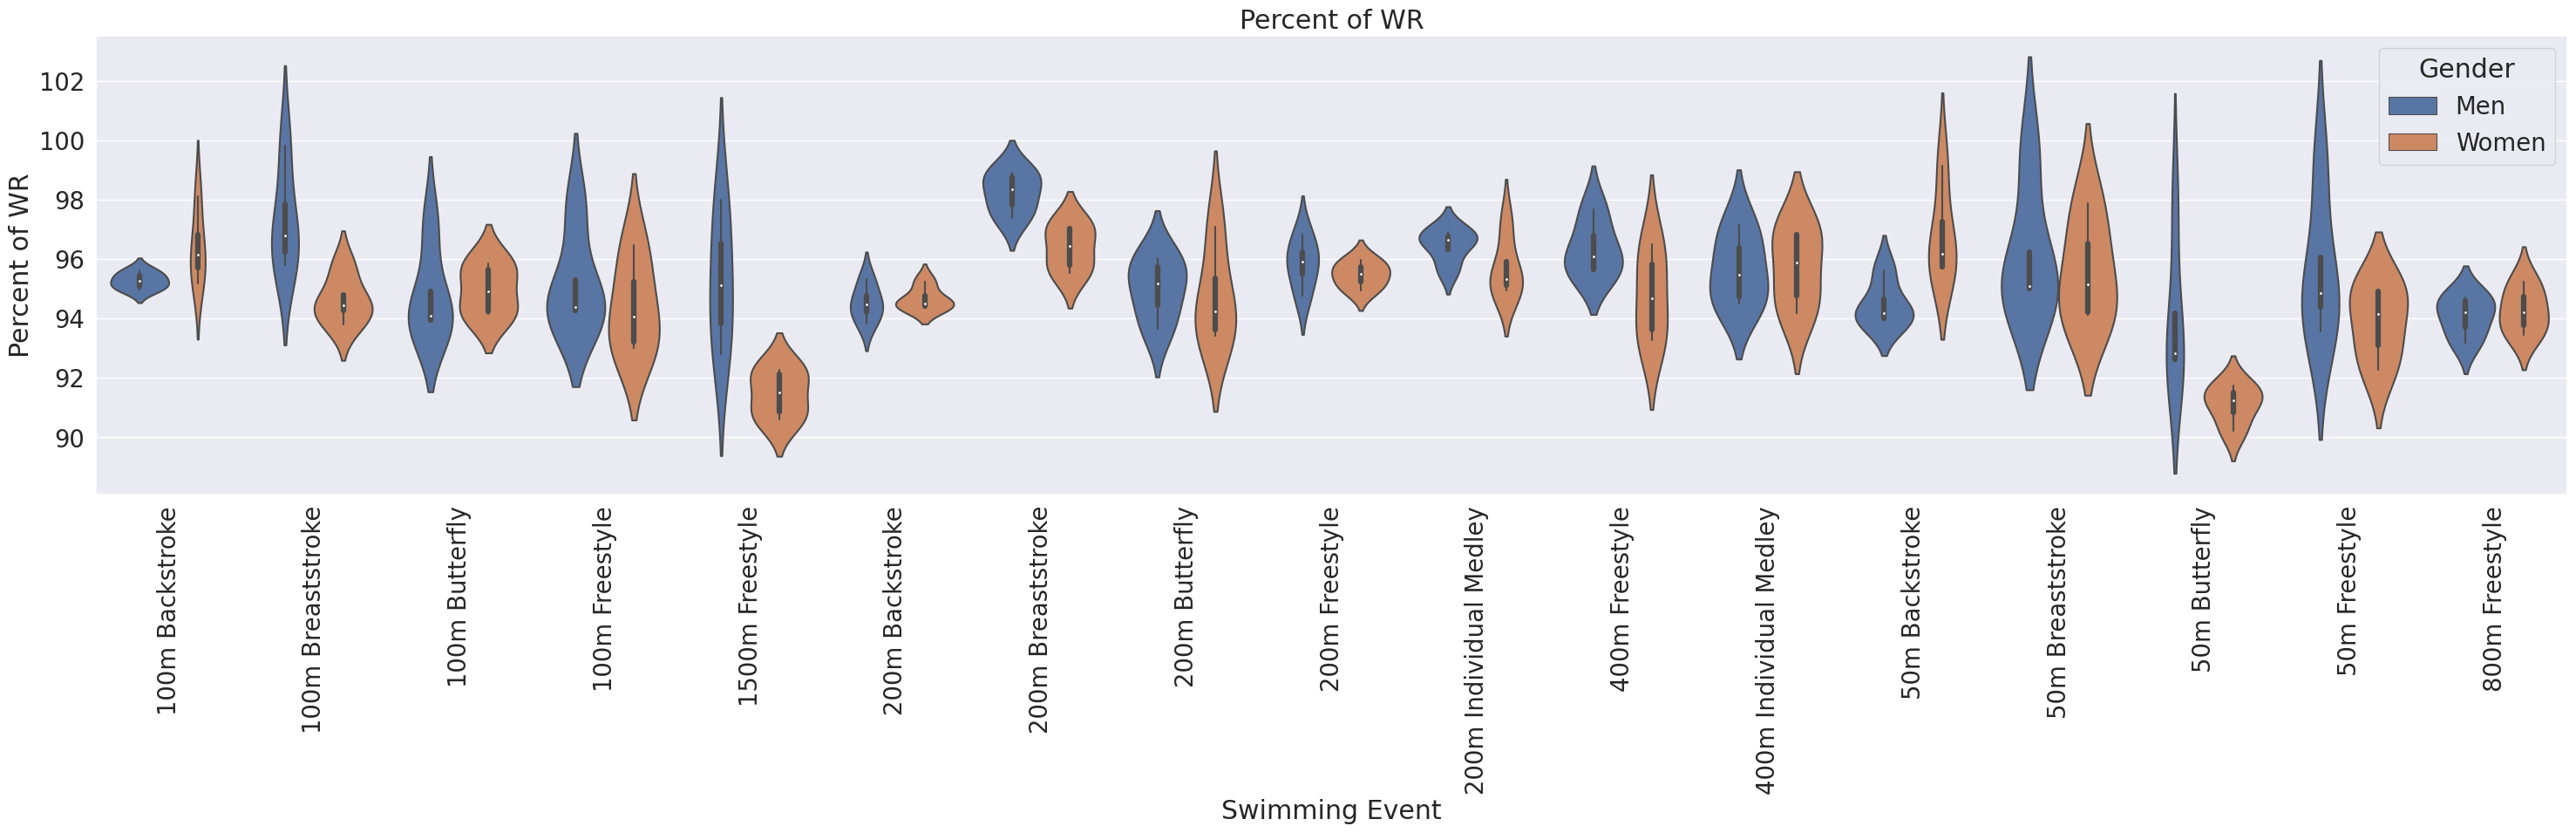

In [ ]:
#Create the visual
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plottedchart

#create variables variable name = dataframe.columnname
event = wr_swimming_df.Event
gender = wr_swimming_df.Gender
percentage = wr_swimming_df.Percent_from_WR

#set font size
sns.set(font_scale=1.8)
#set figure size (width, height)
plottedchart.figure(figsize=(30,10))

plot = sns.violinplot(x=event, y=percentage, data=wr_swimming_df, hue=gender)

plottedchart.title('Percent of WR')
plottedchart.ylabel('Percent of WR')
plottedchart.xlabel('Swimming Event')
#rotate x axis text
plottedchart.xticks(rotation=90)

#Adjust the padding between and around subplots  
plottedchart.tight_layout()





##### Reference Image
![BonusViz](./data/swimming_challenge.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82522c04-b10e-4808-ba92-f37909eae5ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>